# Regressão 01 - Transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. observe o gráfico de resíduos em função de ```net_bill```
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [210]:
import patsy
import pandas   as pd
import seaborn  as sns
import numpy    as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

from seaborn import load_dataset

# Carregando a base de dados das gorjetas
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.

In [211]:
# Criando a matriz de design
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [212]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

2. Remova as variáveis não significantes.

In [213]:
# Para determinar quais as variáveis que não são significantes temos primeiro de criar o modelo e obter o sumario dele

modelo_inicial = smf.ols('tip ~ sex + smoker + time + net_bill', data=tips).fit()
print(modelo_inicial.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           2.64e-20
Time:                        00:02:09   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [214]:
# É possível observar que as variáveis 'sex', 'time' e 'smoker' não são significantes. Portanto é possível retira-las do modelo
# Elas serão retiradas uma por iteração para verificar se outra variável se torna mais significante

# Modelo sem 'sex'
modelo_no_sex = smf.ols('tip ~ smoker + time + net_bill', data=tips).fit()
print(modelo_no_sex.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.35
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           3.79e-21
Time:                        00:02:09   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             758.3
Df Residuals:                     240   BIC:                             772.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1978      0.221      5.

In [215]:
# Modelo sem 'smoker'
modelo_no_smoker = smf.ols('tip ~ time + net_bill', data=tips).fit()
print(modelo_no_smoker.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.11
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           6.62e-22
Time:                        00:02:09   Log-Likelihood:                -375.58
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3015      0.191      6.

In [216]:
# Modelo sem 'time'
modelo_final = smf.ols('tip ~ net_bill', data=tips).fit()
print(modelo_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           5.02e-23
Time:                        00:02:09   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

Quando retiradas uma variável por iteração, foi possível observar que elas não se tornaram mais significantes do que a 'net_bill'

3. Observe o gráfico de resíduos em função de net_bill

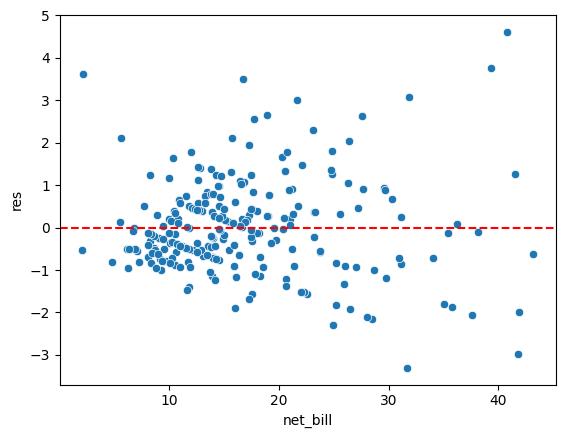

In [217]:
tips['res']= modelo_final.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

4. Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [218]:
modelo_log_x = smf.ols('tip ~ np.log(net_bill)', data=tips).fit()
print(modelo_log_x.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           4.40e-20
Time:                        00:02:09   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

O melhor modelo encontrado foi o que possui a variável tip como alvo e net_bill como explicativa, sem aplicar log em nenhuma das variáveis

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [219]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [220]:
y

DesignMatrix with shape (244, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
      1.54969
      0.69315
      1.13783
      0.67294
      1.17248
      0.53649
      1.60944
      0.45108
      1.09861
      1.10526
      1.36609
      0.51282
      1.31103
      1.25276
      1.20896
      1.40610
      1.01160
      0.80200
      2.02551
      1.15688
      0.85015
      0.69315
      0.69315
      1.45862
      1.09861
  [214 rows omitted]
  Terms:
    'np.log(tip)' (column 0)
  (to view full data, use np.asarray(this_obj))

2. Remova as variáveis não significantes.

In [221]:
# Inicialmente crio o modelo com o log de 'tip' e vou retirando as variáveis não significativas
modelo_inicial_log_y = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data=tips).fit()

# Após isso vou retirando cada uma das variáveis não significativas por iteração para verificar se elas se tornam mais significativas
# Retirando a variável 'sex'
modelo_log_y_no_sex = smf.ols('np.log(tip) ~ smoker + time + net_bill', data=tips).fit()

# Retirando a variável 'smoker'
modelo_log_y_no_smoker = smf.ols('np.log(tip) ~ time + net_bill', data=tips).fit()

# Retirando a variável 'time'
modelo_log_y_final = smf.ols('np.log(tip) ~ net_bill', data=tips).fit()

print(modelo_inicial_log_y.summary())
print(modelo_log_y_no_sex.summary())
print(modelo_log_y_no_smoker.summary())
print(modelo_log_y_final.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.21e-18
Time:                        00:02:09   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

3. Observe o gráfico de resíduos em função de net_bill

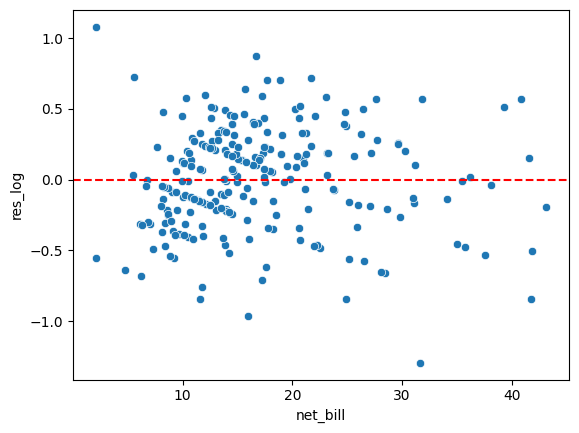

In [222]:
tips['res_log']= modelo_log_y_final.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

4. Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [223]:
# Modelo com log aplicado a tip e em net_bill
modelo_log_y_log_X = smf.ols('np.log(tip) ~ np.log(net_bill)', data=tips).fit()

# Modelo com polinomio de segundo grau aplicado a net_bill
modelo_log_y_power_X = smf.ols('np.log(tip) ~ np.power(net_bill,2)', data=tips).fit()

print(modelo_log_y_log_X.summary())
print(modelo_log_y_power_X.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           5.62e-22
Time:                        00:02:10   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

O melhor modelo dentre o com log aplicado a net_bill ou com o polinomio é o com log aplicado a net_bill.

5. Do modelo final deste item, calcule o R2 na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [224]:
# Modelo com o log aplicado somente a net_bill
modelo_y_log_X = smf.ols('tip ~ np.log(net_bill)', data=tips).fit()
print(modelo_y_log_X.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           4.40e-20
Time:                        00:02:10   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

Dentre todos os modelos feitos a partir de todas as variáveis foi o que considerou somente tip e net_bill sem nenhum operador em nenhum deles. O R² deste modelo foi de 0,333

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [225]:
df_renda = pd.read_csv('/content/previsao_de_renda.csv')
df_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1. Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [226]:
modelo_renda = smf.ols('renda ~ tempo_emprego', data=df_renda).fit()
print(modelo_renda.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:02:10   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

Pelo que é possível observar nos resultados presentes da regressão o modelo não está se ajustando muito bem aos dados, por apresentar um R² de apenas 0,155. Portanto o modelo não está explicando bem os dados.

2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

In [227]:
# Criação da coluna com os resíduos da do modelo inicial
df_renda['res_renda']= modelo_renda.resid

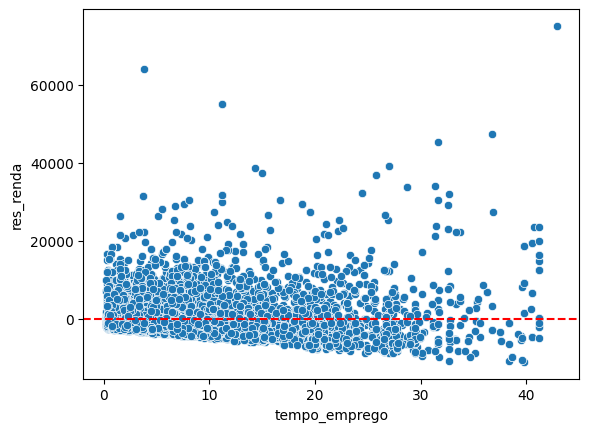

In [228]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:02:10   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002

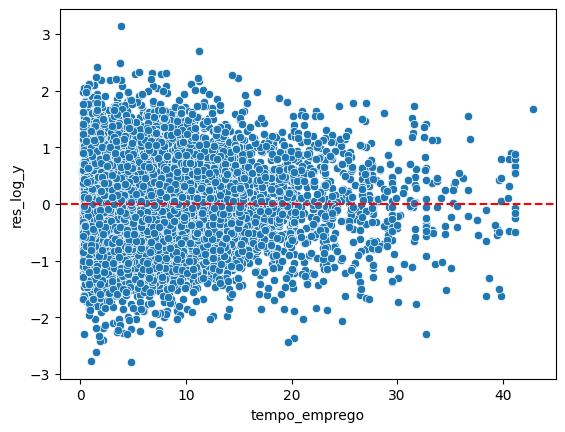

In [229]:
# Primeira tentativa: aplicar o operador log na variável renda

modelo_renda_log_y = smf.ols('np.log(renda) ~ tempo_emprego', data=df_renda).fit()

df_renda['res_log_y']= modelo_renda_log_y.resid

# Sumário e gráfico da tentativa
print(modelo_renda_log_y.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res_log_y', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          7.66e-236
Time:                        00:02:11   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.16

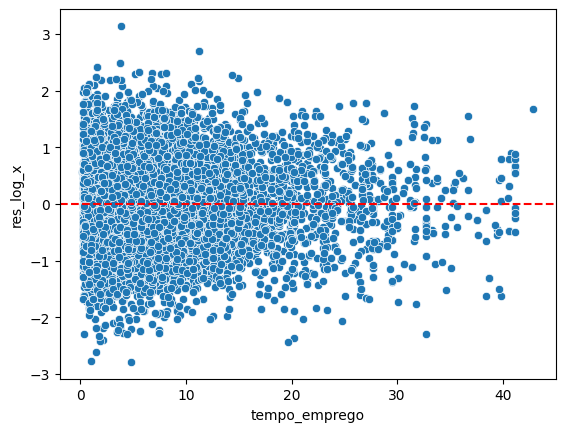

In [230]:
# Segunda tentativa: aplicar o operador log na variável tempo_emprego

modelo_renda_log_x = smf.ols('renda ~ np.log(tempo_emprego)', data=df_renda).fit()

df_renda['res_log_x']= modelo_renda_log_y.resid

# Sumário e gráfico da tentativa
print(modelo_renda_log_x.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res_log_x', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          2.85e-289
Time:                        00:02:12   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.74

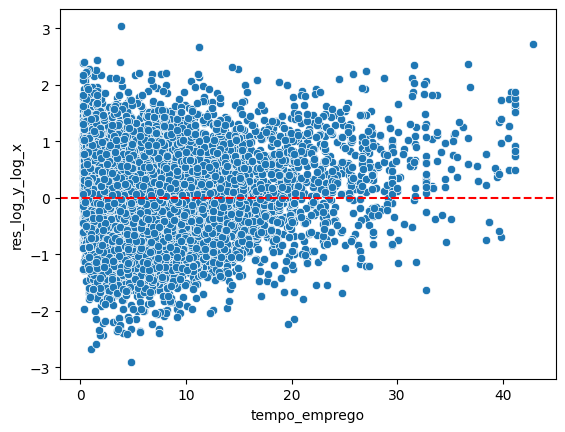

In [231]:
# Terceira tentativa: aplicar o operador log na variável renda e tempo_emprego

modelo_renda_log_y_log_x = smf.ols('np.log(renda) ~ np.log(tempo_emprego)', data=df_renda).fit()

df_renda['res_log_y_log_x'] = modelo_renda_log_y_log_x.resid

# Sumário e gráfico da tentativa
print(modelo_renda_log_y_log_x.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res_log_y_log_x', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:02:12   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

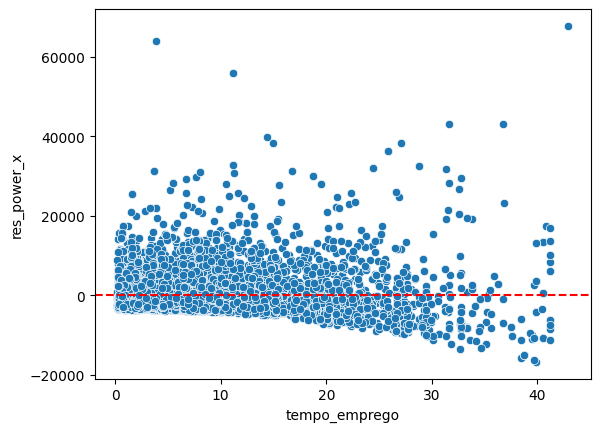

In [232]:
# Criando os modelos com o operador de polinomio em cada uma das variáveis e tambpem um modelo com o operador em ambas
modelo_power_x = smf.ols('renda ~ np.power(tempo_emprego,2)', data = df_renda).fit()
modelo_power_y = smf.ols('np.power(renda,2) ~ tempo_emprego', data = df_renda).fit()
modelo_power_x_power_y = smf.ols('np.power(renda,2) ~ np.power(tempo_emprego,2)', data = df_renda).fit()

# Inclusão dos residuos em colunas do dataframe para fazer o estudo dos gráficos
df_renda['res_power_x'] = modelo_power_x.resid
df_renda['res_power_y'] = modelo_power_y.resid
df_renda['res_power_x_power_y'] = modelo_power_x_power_y.resid

# Sumario e gráfico de residuos do modelo com operador na variável tempo_emprego
print(modelo_power_x.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res_power_x', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:     np.power(renda, 2)   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.72e-227
Time:                        00:02:13   Log-Likelihood:            -2.5317e+05
No. Observations:               12466   AIC:                         5.064e+05
Df Residuals:                   12464   BIC:                         5.064e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.575e+06   2.18e+06     -3.022

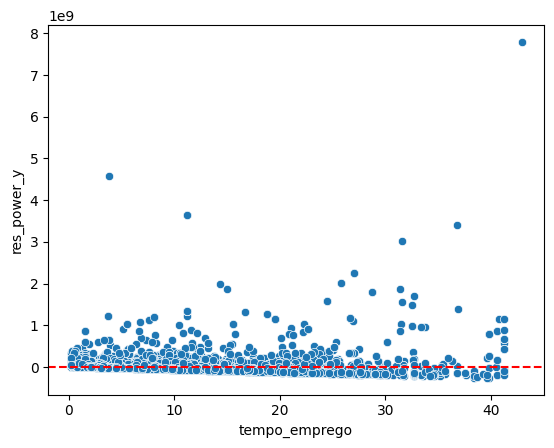

In [233]:
# Sumario e gráfico de residuos do modelo com operador na variável renda
print(modelo_power_y.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res_power_y', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:     np.power(renda, 2)   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1454.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          4.50e-301
Time:                        00:02:13   Log-Likelihood:            -2.5300e+05
No. Observations:               12466   AIC:                         5.060e+05
Df Residuals:                   12464   BIC:                         5.060e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

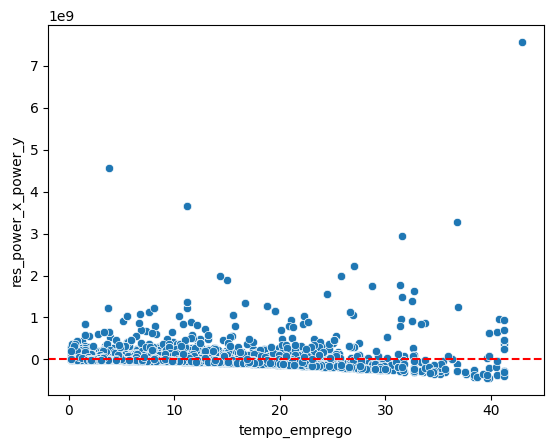

In [234]:
# Sumario e gráfico de residuos do modelo com operador em ambas as variáveis
print(modelo_power_x_power_y.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res_power_x_power_y', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

Foi possível melhorar o gráfico de residuos quando foi feito um modelo com o operador de polinomio aplicado a variável tempo_emprego. Este foi o melhor modelo pois o R² é 0,166 e gráfico de residuos ficou muito mais alinhado.

3. Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [235]:
modelo_all_var = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda).fit()
print(modelo_all_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:02:14   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12442   BIC:                         2.442e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

Para realizar as iterações testes retirando as variáveis que não são significativas, irei realizar vários modelos retirando uma por iteração para verificar se ao retirar uma variável, outra irá se tornar mais significativa.

In [236]:
# Na primeira iteração irei retirar a variável posse_de_veiculo

modelo_v1 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda).fit()
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:02:14   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12443   BIC:                         2.442e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [237]:
modelo_v1 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda).fit()
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:02:15   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12443   BIC:                         2.442e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [238]:
# Na segunda iteração irei retirar o valor Bolsista que reside dentro da variável tipo_renda
# Dataframe que não possui o tipo de renda Bolsista
df_renda_v1 = df_renda[df_renda['tipo_renda'] != 'Bolsista']

modelo_v2 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v1).fit()
print(modelo_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:02:15   Log-Likelihood:            -1.2195e+05
No. Observations:               12462   AIC:                         2.439e+05
Df Residuals:                   12440   BIC:                         2.441e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [239]:
# Na terceira iteração irei retirar o valor Pensionista que reside dentro da variável tipo_renda
# Dataframe que não possui o tipo de renda Pensionista
df_renda_v2 = df_renda_v1[df_renda_v1['tipo_renda'] != 'Pensionista']

modelo_v3 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v2).fit()
print(modelo_v3.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     176.1
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:02:15   Log-Likelihood:            -1.2186e+05
No. Observations:               12453   AIC:                         2.438e+05
Df Residuals:                   12432   BIC:                         2.439e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [240]:
# Na quarta iteração irei retirar o valor Secundário que reside dentro da variável educacao
# Dataframe que não possui o tipo de renda Secundário
df_renda_v3 = df_renda_v2[df_renda_v2['educacao'] != 'Secundário']

modelo_v4 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v3).fit()
print(modelo_v4.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     76.66
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.23e-261
Time:                        00:02:16   Log-Likelihood:                -52020.
No. Observations:                5294   AIC:                         1.041e+05
Df Residuals:                    5274   BIC:                         1.042e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [241]:
# Na quinta iteração irei retirar o valor Superior completo que reside dentro da variável educacao
# Dataframe que não possui o tipo de renda Superior completo
df_renda_v4 = df_renda_v3[df_renda_v3['educacao'] != 'Superior incompleto']

modelo_v5 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v4).fit()
print(modelo_v5.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     72.58
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          5.22e-234
Time:                        00:02:16   Log-Likelihood:                -46535.
No. Observations:                4725   AIC:                         9.311e+04
Df Residuals:                    4706   BIC:                         9.323e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [242]:
# Na sexta iteração irei retirar o valor Superior incompleto que reside dentro da variável educacao
# Dataframe que não possui o tipo de renda Superior incompleto
df_renda_v5 = df_renda_v4[df_renda_v4['educacao'] != 'Superior completo']

modelo_v6 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v5).fit()
print(modelo_v6.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1.818
Date:                Sat, 24 Jun 2023   Prob (F-statistic):             0.0386
Time:                        00:02:16   Log-Likelihood:                -1129.8
No. Observations:                 118   AIC:                             2294.
Df Residuals:                     101   BIC:                             2341.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Aqui é válida uma reflexão sobre as variáveis explicativas. Ao fazer a iteração para retirar o valor de "Superior completo" da variável "educacao" foi observado que isso ocasionou que as variáveis "sexo, posse_de_imovel, tipo_renda", se tornassem estatisticamente não significantes. Portanto irei deixar o valor de "Superior completo" para ser tratado futuramente.

In [243]:
# Na sétima iteração irei retirar o valor Separado que reside dentro da variável estado_civil
# Dataframe que não possui o tipo de renda Separado
df_renda_v6 = df_renda_v4[df_renda_v4['estado_civil'] != 'Separado']

modelo_v7 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v6).fit()
print(modelo_v7.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     72.19
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          5.98e-220
Time:                        00:02:16   Log-Likelihood:                -43731.
No. Observations:                4440   AIC:                         8.750e+04
Df Residuals:                    4422   BIC:                         8.761e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [244]:
# Na oitava iteração irei retirar o valor Solteiro que reside dentro da variável estado_civil
# Dataframe que não possui o tipo de renda Solteiro
df_renda_v7 = df_renda_v6[df_renda_v6['estado_civil'] != 'Solteiro']

modelo_v8 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v7).fit()
print(modelo_v8.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     57.60
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.11e-165
Time:                        00:02:16   Log-Likelihood:                -37730.
No. Observations:                3830   AIC:                         7.549e+04
Df Residuals:                    3813   BIC:                         7.560e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [245]:
# Na nona iteração irei retirar o valor União que reside dentro da variável estado_civil
# Dataframe que não possui o tipo de renda União
df_renda_v8 = df_renda_v7[df_renda_v7['estado_civil'] != 'União']

modelo_v9 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v8).fit()
print(modelo_v9.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     56.07
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          5.10e-151
Time:                        00:02:16   Log-Likelihood:                -34296.
No. Observations:                3476   AIC:                         6.862e+04
Df Residuals:                    3460   BIC:                         6.872e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [246]:
# Na décima iteração irei retirar o valor Viúvo que reside dentro da variável estado_civil
# Dataframe que não possui o tipo de renda Viúvo
df_renda_v9 = df_renda_v8[df_renda_v8['estado_civil'] != 'Viúvo']

modelo_v10 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data = df_renda_v9).fit()
print(modelo_v10.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     56.16
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          7.59e-142
Time:                        00:02:16   Log-Likelihood:                -33086.
No. Observations:                3351   AIC:                         6.620e+04
Df Residuals:                    3336   BIC:                         6.629e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [247]:
# Na 11ª iteração irei retirar o valor Governamental que reside dentro da variável tipo_residencia
# Dataframe que não possui o tipo de renda Governamental
df_renda_v10 = df_renda_v9[df_renda_v9['tipo_residencia'] != 'Governamental']

modelo_v11 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego', data = df_renda_v10).fit()
print(modelo_v11.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     59.09
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          3.22e-139
Time:                        00:02:17   Log-Likelihood:                -32272.
No. Observations:                3268   AIC:                         6.457e+04
Df Residuals:                    3254   BIC:                         6.466e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [248]:
# Na 12ª iteração irei retirar o valor Estúdio que reside dentro da variável tipo_residencia
# Dataframe que não possui o tipo de renda Estúdio
df_renda_v11 = df_renda_v10[df_renda_v10['tipo_residencia'] != 'Estúdio']

modelo_v12 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego', data = df_renda_v11).fit()
print(modelo_v12.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     64.94
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          7.75e-142
Time:                        00:02:17   Log-Likelihood:                -31875.
No. Observations:                3229   AIC:                         6.378e+04
Df Residuals:                    3216   BIC:                         6.385e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [249]:
# Na 13ª iteração irei retirar o valor Comunitário que reside dentro da variável tipo_residencia
# Dataframe que não possui o tipo de renda Comunitário
df_renda_v12 = df_renda_v11[df_renda_v11['tipo_residencia'] != 'Comunitário']

modelo_v13 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego', data = df_renda_v12).fit()
print(modelo_v13.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     70.50
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          6.13e-142
Time:                        00:02:17   Log-Likelihood:                -31576.
No. Observations:                3198   AIC:                         6.318e+04
Df Residuals:                    3186   BIC:                         6.325e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [250]:
# Na 14ª iteração irei retirar o valor Com os pais que reside dentro da variável tipo_residencia
# Dataframe que não possui o tipo de renda Com os pais
df_renda_v13 = df_renda_v12[df_renda_v12['tipo_residencia'] != 'Com os pais']

modelo_v14 = smf.ols('renda ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego', data = df_renda_v13).fit()
print(modelo_v14.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     73.68
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          1.94e-135
Time:                        00:02:17   Log-Likelihood:                -30101.
No. Observations:                3045   AIC:                         6.022e+04
Df Residuals:                    3034   BIC:                         6.029e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [251]:
# Na 15ª iteração irei retirar o valor Com os pais que reside dentro da variável tipo_residencia
# Dataframe que não possui o tipo de renda Com os pais
df_renda_v14 = df_renda_v13[df_renda_v13['tipo_residencia'] != 'Casa']

modelo_v15 = smf.ols('renda ~ sexo + posse_de_imovel + tipo_renda + educacao + tipo_residencia + qtd_filhos + idade + tempo_emprego', data = df_renda_v14).fit()
print(modelo_v15.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     2.652
Date:                Sat, 24 Jun 2023   Prob (F-statistic):             0.0350
Time:                        00:02:17   Log-Likelihood:                -275.66
No. Observations:                  30   AIC:                             569.3
Df Residuals:                      21   BIC:                             581.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [252]:
# Na 16ª iteração irei retirar a variável tipo_renda, qtd_filho e tipo_residencia

modelo_v16 = smf.ols('renda ~ sexo + posse_de_imovel + idade + tempo_emprego', data = df_renda_v13).fit()
print(modelo_v16.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     172.2
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          4.15e-133
Time:                        00:02:17   Log-Likelihood:                -30121.
No. Observations:                3045   AIC:                         6.025e+04
Df Residuals:                    3040   BIC:                         6.028e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

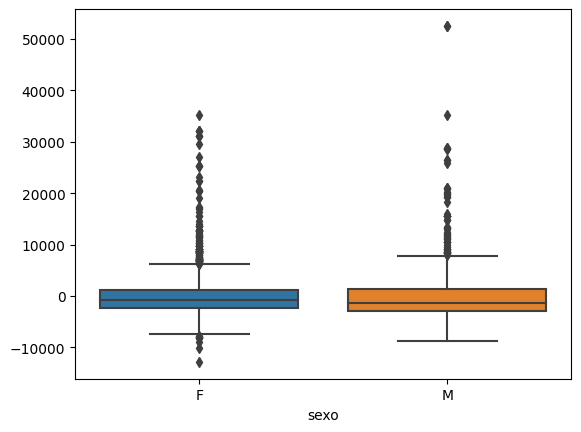

In [255]:
# Primeiro faço um gráfico dos resíduos para cada uma das variáveis:
# Começando pela variável "sexo"

# Calculo dos residuos do modelo
residuos = modelo_v16.resid

# Como a variável "sexo" é categórica, é necessário utilizar o gráfico boxplot
sns.boxplot(x='sexo', y=residuos, data = df_renda)
plt.show()

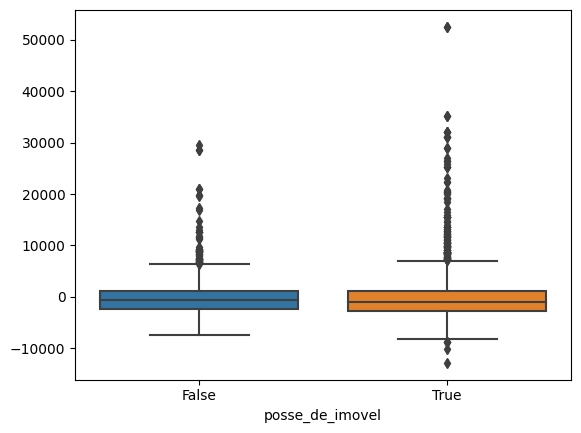

In [256]:
# Como a variável "posse_de_imovel" é categórica, é necessário utilizar o gráfico boxplot
sns.boxplot(x='posse_de_imovel', y=residuos, data = df_renda)
plt.show()

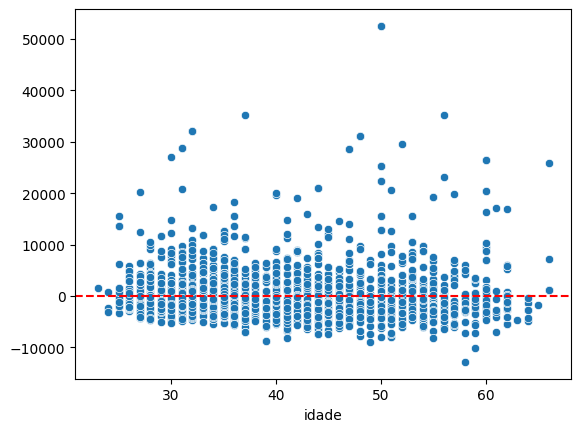

In [258]:
# Gráfico da variável idade
sns.scatterplot(x = 'idade', y = residuos, data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

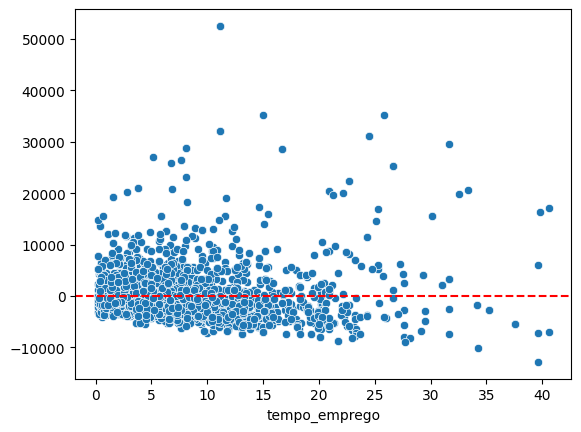

In [259]:
# Gráfico da variável tempo_emprego
sns.scatterplot(x = 'tempo_emprego', y = residuos, data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

Pela analise dos gráfico é possivel observar que as varíaveis sexo e posse_de_imovel, não são significantes mesmo que o valor de "p" tenha indicado que são significantes. Porém mesmo após todas as iterações e tentativas, os valores de R² indicam que seriam necessárias outras medidas para adequar os dador e/ou outros modelos para que os dados fossem preditos de uma melhor forma.